## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_table = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
merge_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
number_of_mice = len(merge_table["Mouse ID"].unique())
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_results_df = merge_table[merge_table.duplicated(["Mouse ID","Timepoint"])]
study_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_results = merge_table[merge_table["Mouse ID"] != "g989"]
clean_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = len(clean_results["Mouse ID"].unique())
number_of_mice

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_df = clean_results.groupby(["Drug Regimen"])
mean_volume = regimen_df["Tumor Volume (mm3)"].mean()
median_volume = regimen_df["Tumor Volume (mm3)"].median()
variance_volume = regimen_df["Tumor Volume (mm3)"].var()
stdDev_volume = regimen_df["Tumor Volume (mm3)"].std()
sem_volume = regimen_df["Tumor Volume (mm3)"].sem()


In [7]:

summary_df = pd.DataFrame({"Mean": mean_volume,
                              "Median": median_volume,
                              "Variance": variance_volume,
                              "Standard Deviation": stdDev_volume,
                              "SEM": sem_volume
                          })
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

Text(0.5, 0, 'Days')

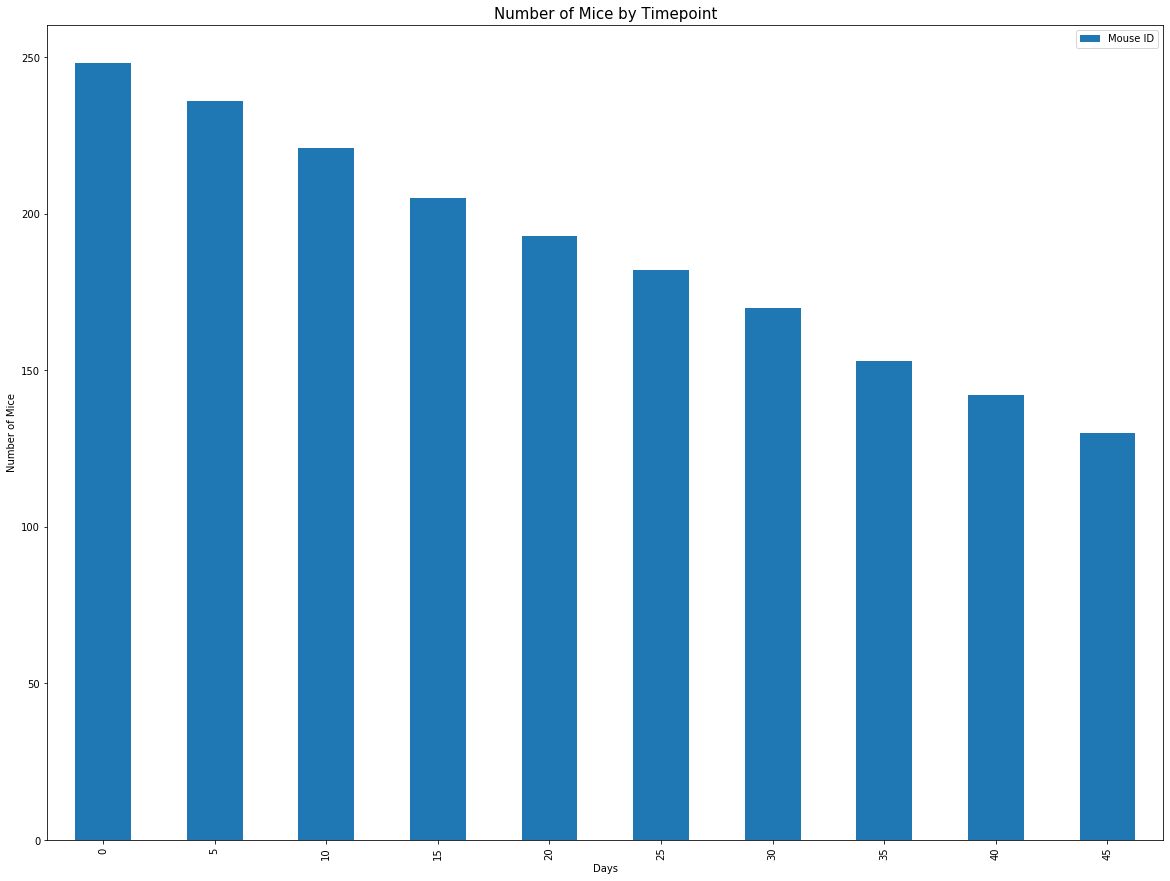

In [8]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
mice_per_timepoint = pd.DataFrame(clean_results.groupby([ "Timepoint"]).count()["Mouse ID"])       
pandas_plot = mice_per_timepoint.plot.bar(title="Number of Mice by Timepoint", figsize=(20,15))
pandas_plot.title.set_size(15)
pandas_plot.set_ylabel("Number of Mice")
pandas_plot.set_xlabel("Days")

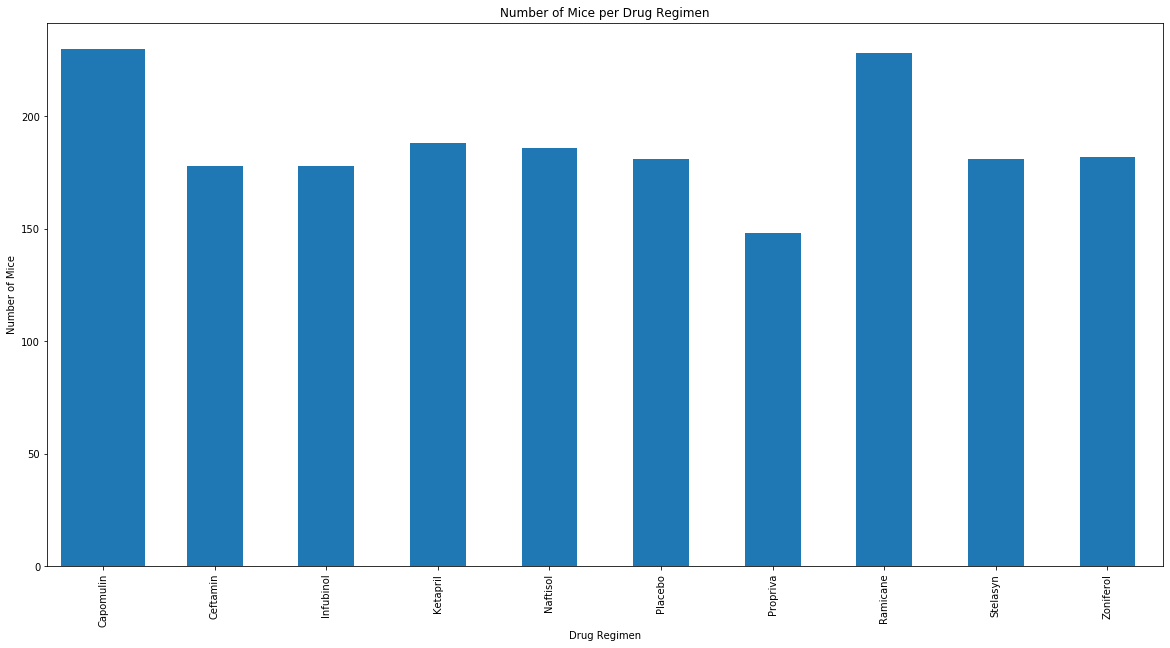

In [9]:
bar_plot_df = clean_results.groupby(["Drug Regimen"]).count()["Mouse ID"]


pandas_plot2 = bar_plot_df.plot.bar(title="Number of Mice per Drug Regimen", figsize=(20,10))
pandas_plot2.title.set_size(15)
pandas_plot2.set_ylabel("Number of Mice")
pandas_plot2.set_xlabel("Drug Regimen")

yvals = bar_plot_df.to_list()
drug_list = mice_per_timepoint.columns.to_list()
font = {"size" : 15}
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")


pyplot = plt.bar(drug_list, yvals, width=.75)

## Pie Plots

Text(0, 0.5, '')

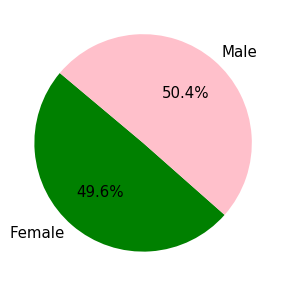

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_results = clean_results[["Sex","Mouse ID"]]
drop_gender_results = gender_results.drop_duplicates()
clean_gender_results = drop_gender_results.rename(columns={"Mouse ID": "Count"})
gender_groups = clean_gender_results.groupby([pd.Grouper(key="Sex")])["Count"].agg("count").reset_index()
colors = ["green", "pink"]
pandas_pieplot = gender_groups.plot(kind="pie", y = "Count", figsize=(5,5), colors=colors, autopct='%1.1f%%', 
 startangle=140, labels=gender_groups["Sex"], legend = False, fontsize=15)
pandas_pieplot.set_ylabel("")


## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
top_regimens = clean_results[clean_results["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
top_regimens = top_regimens.sort_values(["Timepoint"], ascending=True)

top_regimens_data = top_regimens[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
top_regimens_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


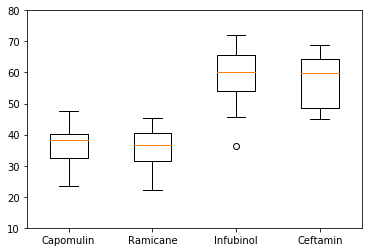

In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
top_regimens_ftv = top_regimens_data.groupby(["Drug Regimen", "Mouse ID"]).last()["Tumor Volume (mm3)"]
top_regimen_df = top_regimens_ftv.to_frame()
top_four_regimens = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"] 
top_four_regimens_df = top_regimen_df.reset_index()
tumor_vol = top_four_regimens_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list)
tumor_vol_df = pd.DataFrame(tumor_vol)
tumor_vol_df = tumor_vol_df.reindex(top_four_regimens)
tumor_vols = [vol for vol in tumor_vol_df["Tumor Volume (mm3)"]]
plt.boxplot(tumor_vols, labels=top_four_regimens)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

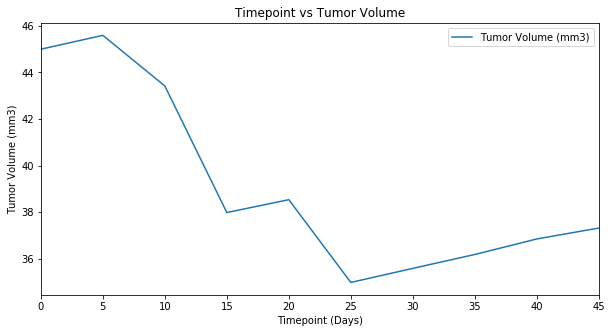

In [13]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
tumor_growth_i738 = clean_results[clean_results["Mouse ID"].isin(["i738"])]
tumor_growth_i738_data = tumor_growth_i738[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
tumor_growth_results = tumor_growth_i738_data.reset_index()
tumor_growth_plot_results = tumor_growth_results[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
plot = tumor_growth_plot_results.plot.line(x="Timepoint", y="Tumor Volume (mm3)", figsize=(10,5))
plt.title("Timepoint vs Tumor Volume")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

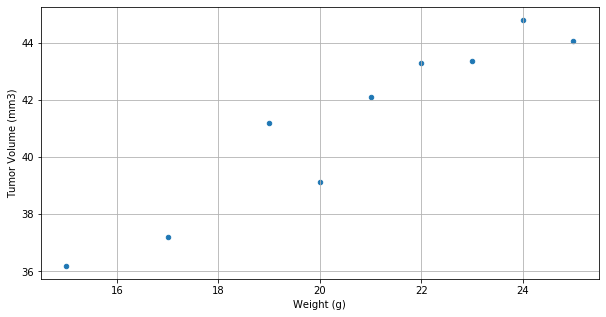

In [14]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight_cap= clean_results[clean_results["Drug Regimen"].isin(["Capomulin"])]
mouse_weight_cap_results = top_regimens[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]
mouse_weight_scatter = mouse_weight_cap.reset_index()
mouse_weight_cap_sort = mouse_weight_scatter.sort_values(["Weight (g)"], ascending=True)
mouse_grouped_weight = mouse_weight_scatter.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
mouse_grouped_plot = pd.DataFrame(mouse_grouped_weight).reset_index()

mouse_weight_cap = mouse_grouped_plot.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)",
                                                grid = True, figsize=(10,5))

## Correlation and Regression

In [15]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
